<h1>Analysis of Beorn D2 chip: power dependance</h1>
Online analysis script used to pre-analyse the data collected during the cooldown of the chip.

In [96]:
sample_name = 'beorn_d2'                    # name of the chip in the fridge

<h3>Basic imports and database loading</h3>

In [97]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
from resonator_tools import circuit

import qcodes as qc
from qcodes import initialise_database, load_by_run_spec
from qcodes.dataset.plotting import plot_by_id

import scipy.stats

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [100]:
db_name = '20220608_sc_s21_meas.db'   # name of the database
db_path  = os.path.join(r'D:\QMET' + '\\' + sample_name + '\\',db_name)

qc.initialise_or_create_database_at(db_path)

<h2>Data analysis and plotting</h2>

<h4>First four steps as a function of the tone power</h4>

In [189]:
# loading
RUN_ID = 6 # 2,6,7
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
ivf_dict = dataset.to_pandas_dataframe_dict()

<h5>Data shaping</h5>

In [190]:
# up ramp
ivf_up_0 = ivf_dict['adwin_up_ramp']
ivf_up_1 = ivf_up_0.reset_index()

pwr_up = ivf_up_1['mw_source_power'].to_numpy()
v_up = ivf_up_1['adwin_input_2_voltage_up'].to_numpy()
i_up = ivf_up_1['adwin_up_ramp'].to_numpy()

# down ramp
ivf_down_0 = ivf_dict['adwin_down_ramp']
ivf_down_1 = ivf_down_0.reset_index()

pwr_down = ivf_down_1['mw_source_power'].to_numpy()
v_down = ivf_down_1['adwin_input_2_voltage_down'].to_numpy()
i_down = ivf_down_1['adwin_down_ramp'].to_numpy()

# reshape to form a 2D array
N = np.unique(pwr_up).shape[0] 
size = (N, -1)

pwr_up = np.reshape(pwr_up, size)
v_up = np.reshape(v_up, size)
i_up = np.reshape(i_up, size)
pwr_down = np.reshape(pwr_down, size)
v_down = np.reshape(v_down, size)
i_down = np.reshape(i_down, size)

# # divide into low-to-high and high-to-low
# M = len(i_up)
# zero_index_up = np.argmin(np.abs(i_up[51]))
# zero_index_down = np.argmin(np.abs(i_down[51]))

# v_lh = np.zeros((M, 2*N - zero_index_down - zero_index_up))
# v_hl = np.zeros((M, zero_index_down + zero_index_up))
# i_lh = np.zeros((M, 2*N - zero_index_down - zero_index_up))
# i_hl = np.zeros((M, zero_index_down + zero_index_up))

# for i in range(M):
#     v_lh[i] = np.concatenate(( np.flip(v_down[i][zero_index_down:]), v_up[i][zero_index_up:] ))
#     v_hl[i] = np.concatenate(( v_up[i][:zero_index_up], np.flip(v_down[i][:zero_index_down]) ))
#     i_lh[i] = np.concatenate(( np.flip(i_down[i][zero_index_down:]), i_up[i][zero_index_up:] ))
    # i_hl[i] = np.concatenate(( i_up[i][:zero_index_up], np.flip(i_down[i][:zero_index_down]) ))

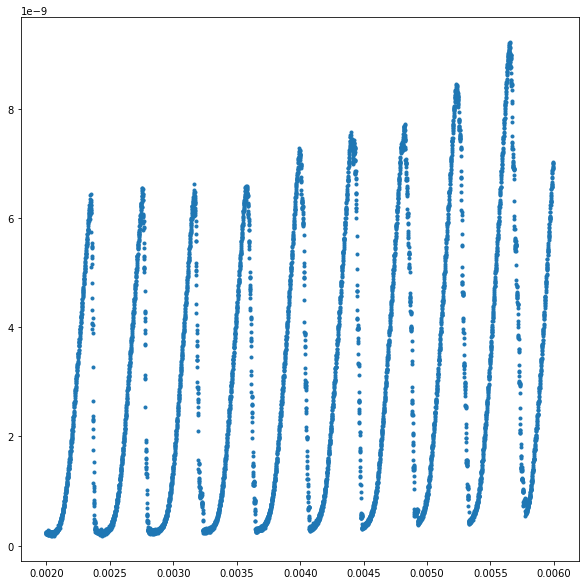

In [191]:
f = 3.829e9
e = 1.6e-19

plt.figure(figsize=(10,10))
plt.plot( v_up[-50, :],i_up[-50, :], '.') # v_up[20, :]

# plt.hlines([2*e*f,4*e*f], 0, 6000, 'r')
# plt.xlim([2000,4000])
# plt.ylim([0,5e-9])

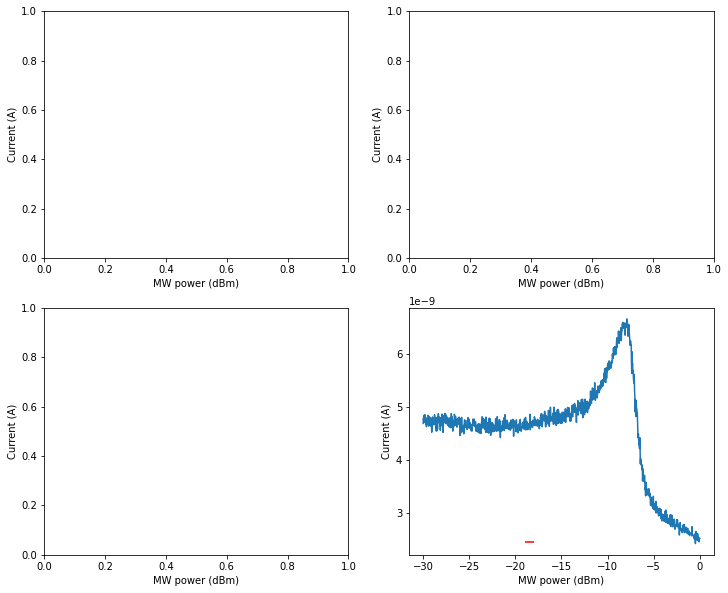

In [192]:
f = 3.829e9
e = 1.6e-19
# RUN ID 4
# avg1 = np.mean(i_up[:, 100:120], axis=1)
# avg2 = np.mean(i_up[:, 195:220], axis=1)
# avg3 = np.mean(i_up[:, 300:330], axis=1)
# avg4 = np.mean(i_up[:, 410:430], axis=1)

# RUN ID 2
# avg1 = np.mean(i_up[:, 350:500], axis=1)
# avg2 = np.mean(i_up[:, 1850:2000], axis=1)
# avg3 = np.mean(i_up[:, 2620:2780], axis=1)
# avg4 = np.mean(i_up[:, 3450:3550], axis=1)

# RUN ID 7
avg1 = np.mean(i_up[:, 1450:1700], axis=1)
avg2 = np.mean(i_up[:, 1450:1700], axis=1)
avg3 = np.mean(i_up[:, 1450:1700], axis=1)
avg4 = np.mean(i_up[:, 2500:3750], axis=1)




line_1 = np.poly1d( np.polyfit(pwr_up[0:50,0], avg1[0:50], 1) )
line_2 = np.poly1d( np.polyfit(pwr_up[0:50,0], avg2[0:50], 1) )
line_3 = np.poly1d( np.polyfit(pwr_up[0:50,0], avg3[0:50], 1) )
line_4 = np.poly1d( np.polyfit(pwr_up[0:50,0], avg4[0:50], 1) )

fix, ax = plt.subplots(2, 2, figsize=(12,10))

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("MW power (dBm)")
        ax[i,j].set_ylabel("Current (A)")


# ax[0,0].plot(pwr_up[:, 0], avg1)
# # ax[0,0].plot(pwr_up[:, 0], line_1(pwr_up[:, 0]))
# ax[0,0].hlines([2*e*f,4*e*f], -22,-16, 'r')        
        
# ax[0,1].plot(pwr_up[:, 0], avg2)
# ax[0,1].plot(pwr_up[:, 0], line_2(pwr_up[:, 0]))
# ax[0,1].hlines([2*e*f,4*e*f], -22,-16, 'r')

# ax[1,0].plot(pwr_up[:, 0], avg3)
# ax[1,0].plot(pwr_up[:, 0], line_3(pwr_up[:, 0]))
# ax[1,0].hlines([2*e*f], -22,-18, 'r')

ax[1,1].plot(pwr_up[:, 0], avg4)
# ax[1,1].plot(pwr_up[:, 0], line_4(pwr_up[:, 0]))
ax[1,1].hlines([4*e*f], -19,-18, 'r')

# plt.savefig("pwr_dependance_4.04GHz_4first_steps.png")

In [193]:
# k1 = 2460
# k2=2900
k1 = 2000
k2=5550

iint = i_up[:, k1:k2]
viint = v_up[:, k1:k2]
piint = pwr_up[:, k1:k2]
didv = np.gradient(iint, viint[0,1]-viint[0,0],axis= 1)

In [194]:
viint.shape

(1001, 3550)

C:\Users\NICOLA~1.ROC\AppData\Local\Temp/ipykernel_2560/627858854.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ctf = ax1.pcolormesh(viint, piint, np.abs(didv)*1e3, shading='auto', vmax=0.15)


Text(0, 0.5, 'power (dBm)')

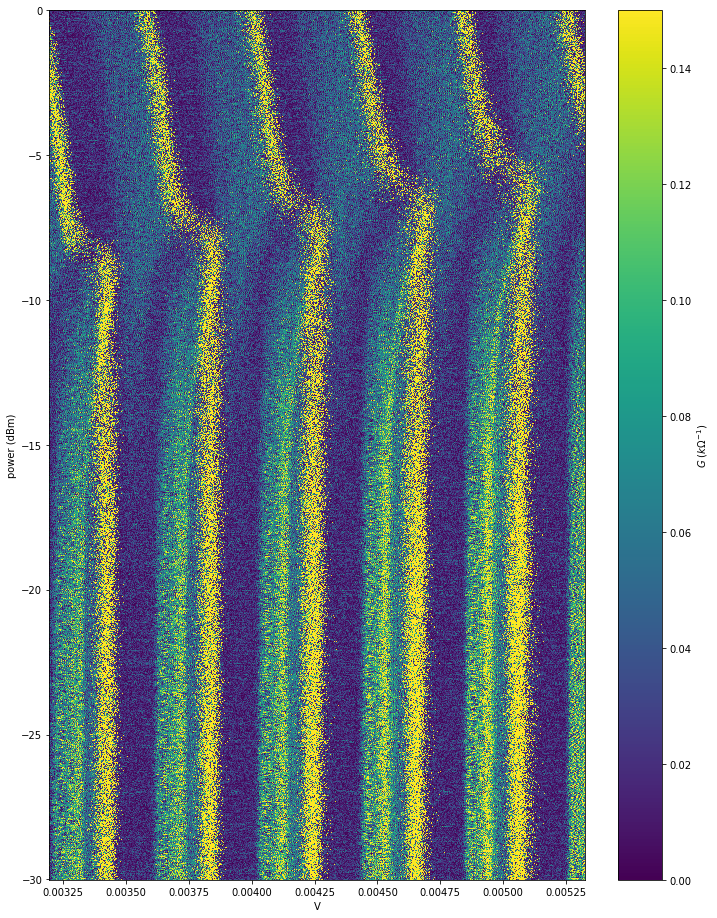

In [195]:
fig, ax1 = plt.subplots(figsize=(12,16))

ctf = ax1.pcolormesh(viint, piint, np.abs(didv)*1e3, shading='auto', vmax=0.15)
fig.colorbar(ctf, label=r'$G~(k\Omega^{-1})$')
ax1.set_xlabel('V')
ax1.set_ylabel('power (dBm)')

C:\Users\NICOLA~1.ROC\AppData\Local\Temp/ipykernel_2560/3190979523.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ctf = ax1.pcolormesh(viint, piint, iint, shading='auto' )


Text(0, 0.5, 'power (dBm)')

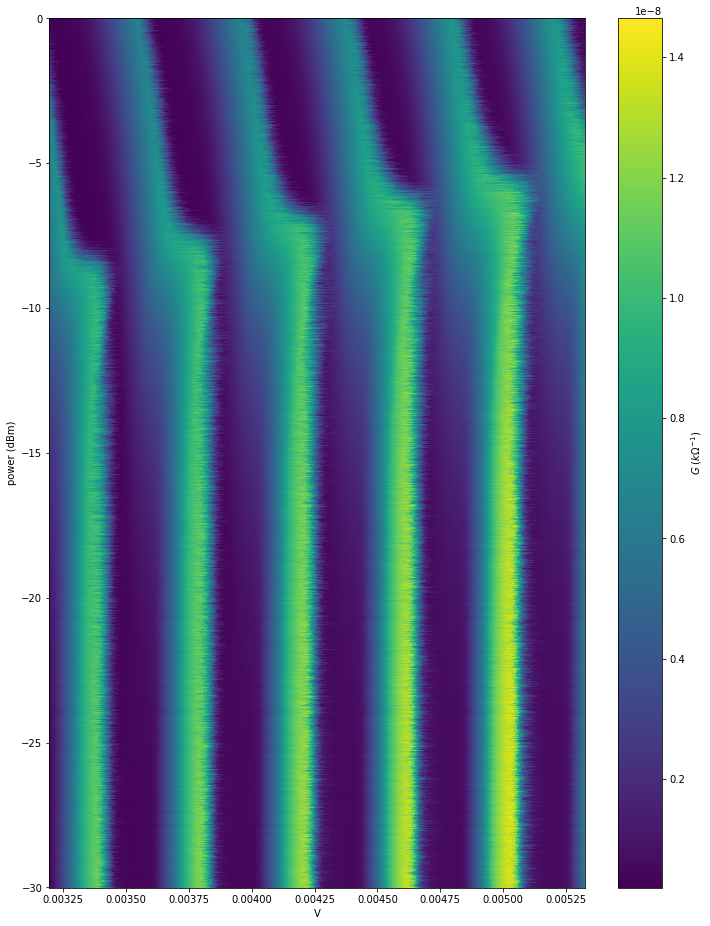

In [196]:
fig, ax1 = plt.subplots(figsize=(12,16))

ctf = ax1.pcolormesh(viint, piint, iint, shading='auto' )
fig.colorbar(ctf, label=r'$G~(k\Omega^{-1})$')
ax1.set_xlabel('V')
ax1.set_ylabel('power (dBm)')